In [40]:
# Importing Python modules
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt

## TITLE: DATA VISUALIZATION USING IPL DATASET

In [97]:

df = pd.read_csv('IPL Matches 2008-2020.csv')
df.head(7)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,NaN,IL Howell,AM Saheba


## Line Chart

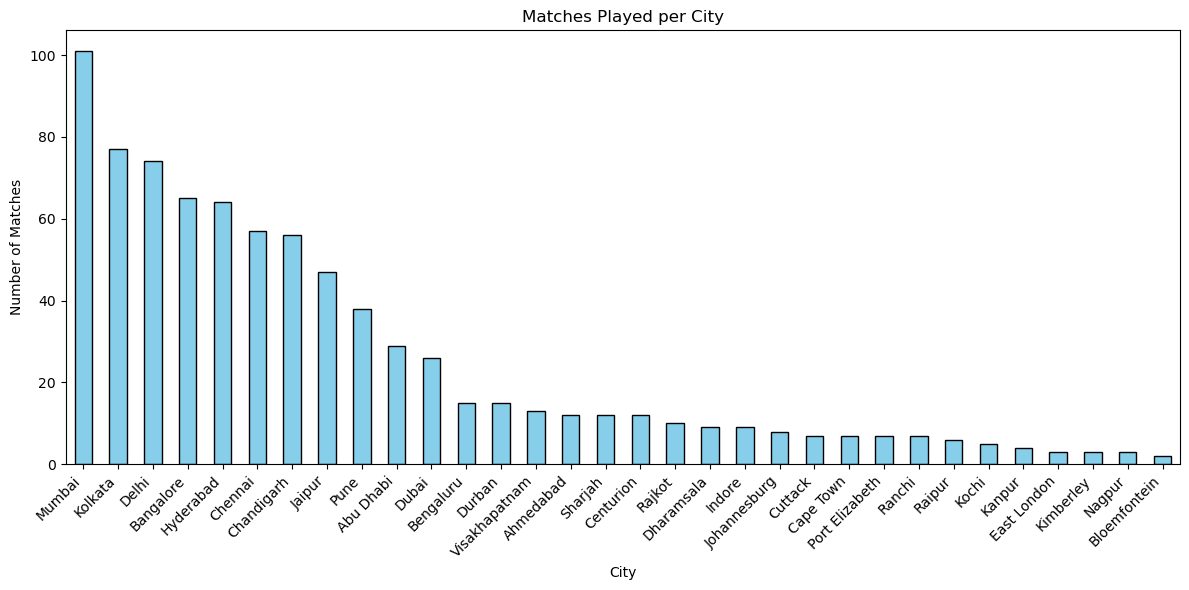

In [48]:


plt.figure(figsize=(12, 6))
city_counts = df['city'].value_counts()
city_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Matches Played per City")
plt.xlabel("City")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3. Line Chart: Trends of matches played over the years

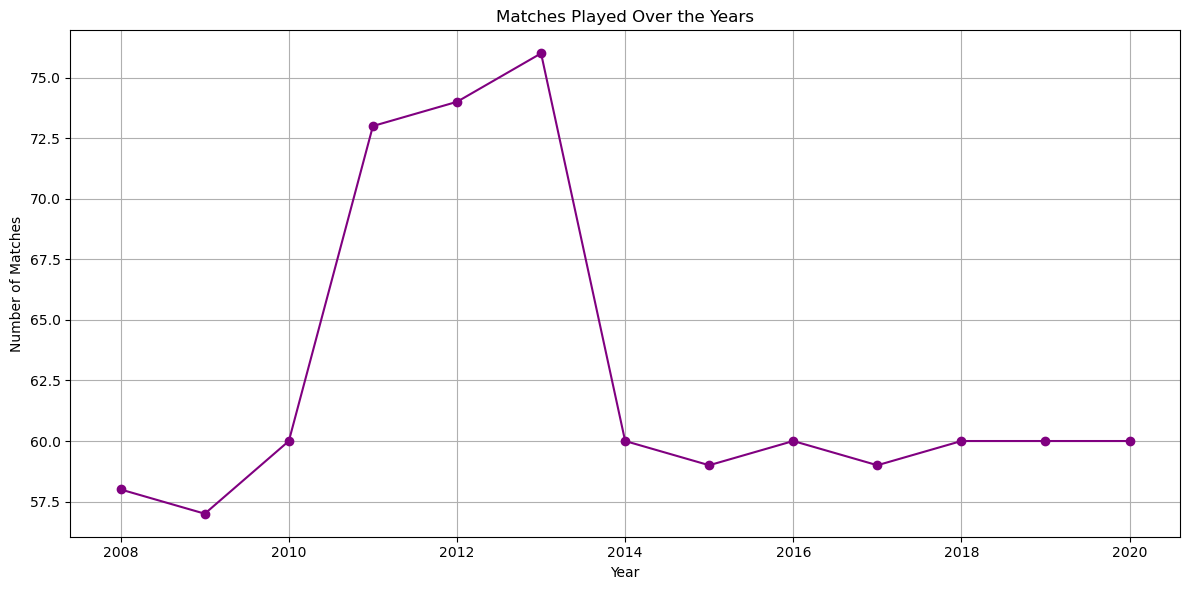

In [62]:

# Convert 'date' to datetime if not already in the correct format
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Handle missing or invalid dates (optional)
if df['date'].isna().any():
    df = df.dropna(subset=['date'])  # Drop rows with invalid dates
plt.figure(figsize=(12, 6))
df['year'] = df['date'].dt.year
matches_per_year = df['year'].value_counts().sort_index()
matches_per_year.plot(kind='line', marker='o', color='purple')
plt.title("Matches Played Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. Box Plot: Distribution of result margin

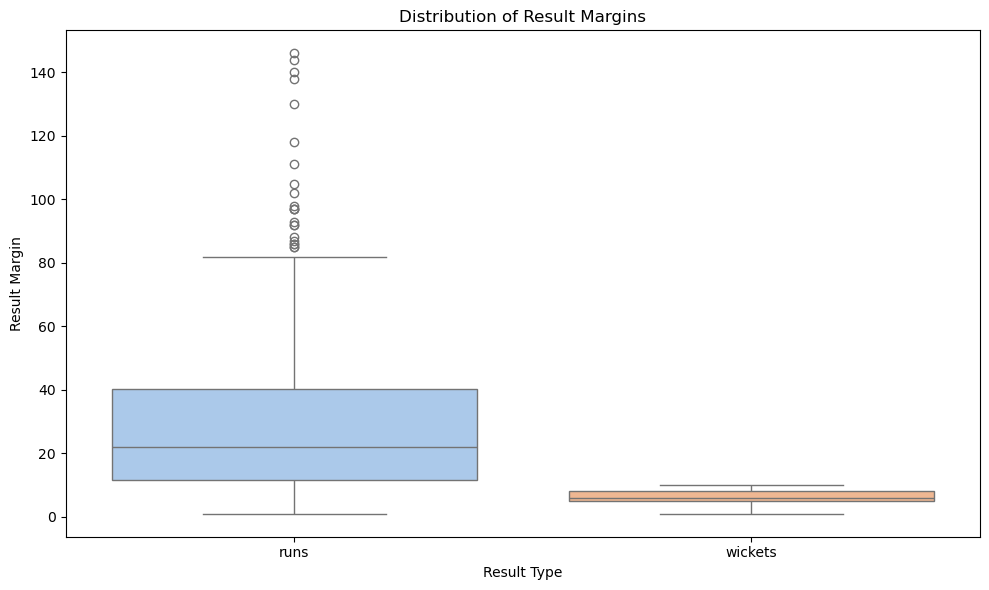

In [80]:

# Check for missing values in 'result' and 'result_margin'
# Convert 'result_margin' to numeric
df['result_margin'] = pd.to_numeric(df['result_margin'], errors='coerce')

# Filter out rows with missing values in 'result' and 'result_margin'
filtered_data = df.dropna(subset=['result', 'result_margin'])

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='result', y='result_margin', data=filtered_data, hue='result', palette="pastel", dodge=False)
plt.title("Distribution of Result Margins")
plt.xlabel("Result Type")
plt.ylabel("Result Margin")
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

## 5. Histogram: Frequency distribution of result margins

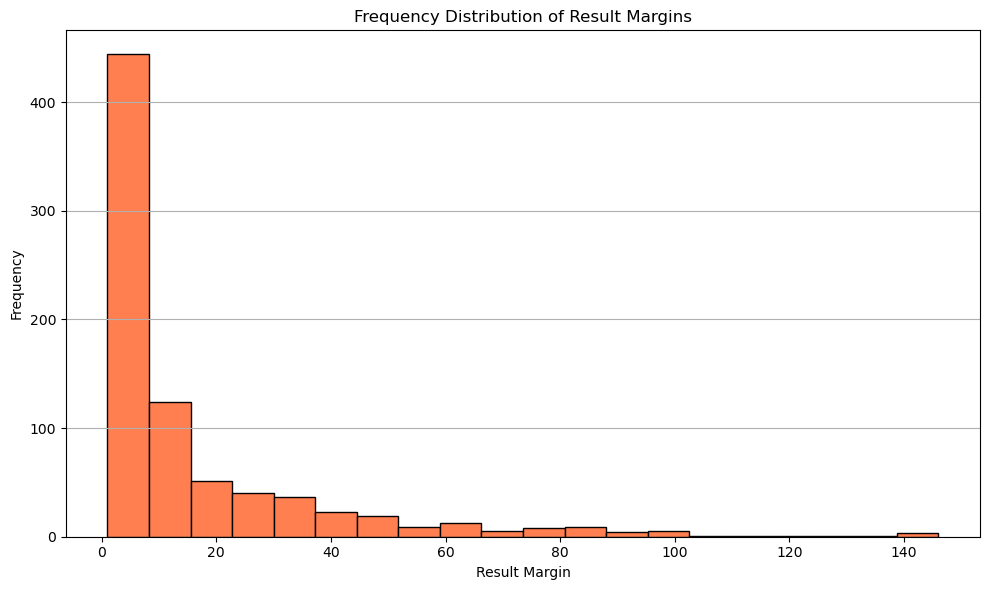

In [88]:

plt.figure(figsize=(10, 6))
df['result_margin'].dropna().plot(kind='hist', bins=20, color='coral', edgecolor='black')
plt.title("Frequency Distribution of Result Margins")
plt.xlabel("Result Margin")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 6. Heatmap: Correlation between numeric fields

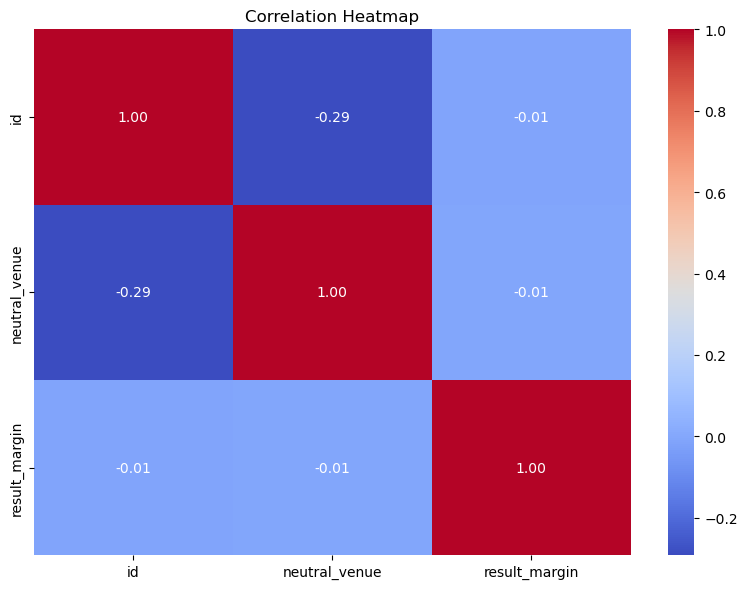

In [92]:

plt.figure(figsize=(8, 6))
numeric_data = df[['id', 'neutral_venue', 'result_margin']]
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

## 7. Count Plot: Frequency of player of the match awards (top 10 players)

C:\Users\U S E R\AppData\Local\Temp\ipykernel_11368\3654260314.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.values, y=top_players.index, palette="viridis")


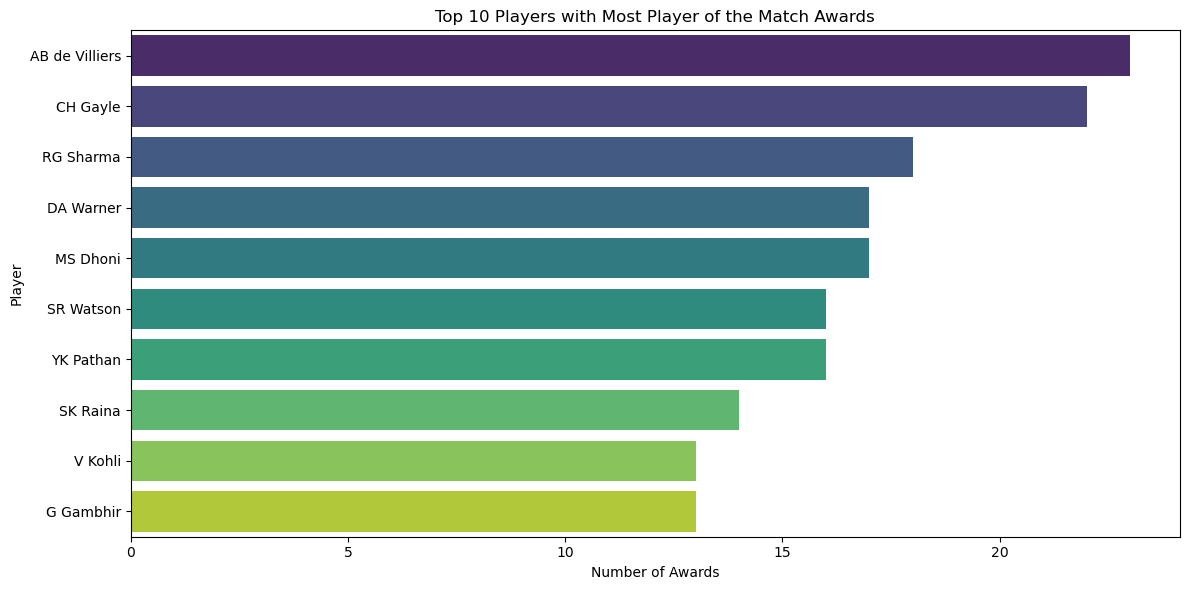

In [94]:

plt.figure(figsize=(12, 6))
top_players = df['player_of_match'].value_counts().head(10)
sns.barplot(x=top_players.values, y=top_players.index, palette="viridis")
plt.title("Top 10 Players with Most Player of the Match Awards")
plt.xlabel("Number of Awards")
plt.ylabel("Player")
plt.tight_layout()
plt.show()